In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
blobs = pd.read_csv('cluster_blobs.csv')

In [3]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<Axes: xlabel='X1', ylabel='X2'>

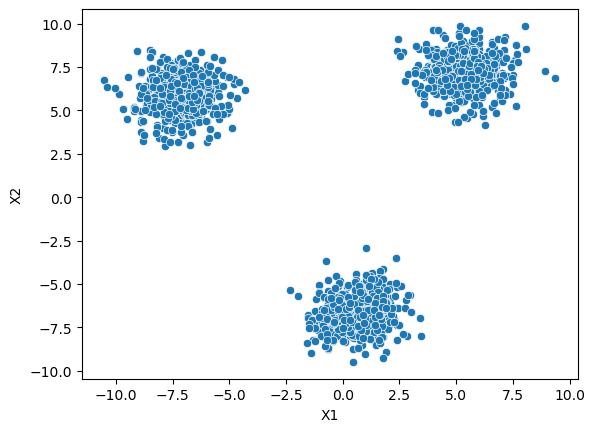

In [4]:
sns.scatterplot(data=blobs, x='X1', y='X2')

In [5]:
moons= pd.read_csv('cluster_moons.csv')

In [7]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<Axes: xlabel='X1', ylabel='X2'>

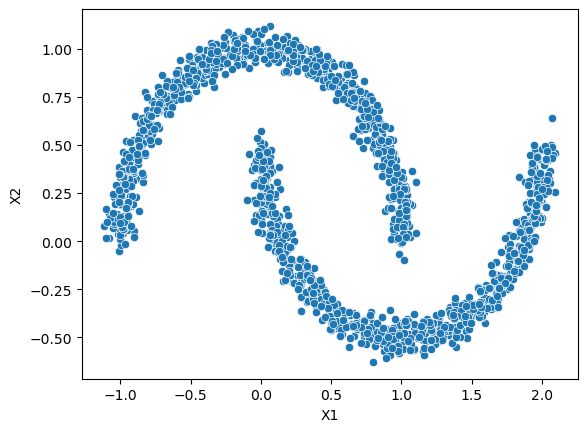

In [6]:
sns.scatterplot(data=moons, x='X1', y='X2')

In [8]:
circles = pd.read_csv('cluster_circles.csv')

In [9]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<Axes: xlabel='X1', ylabel='X2'>

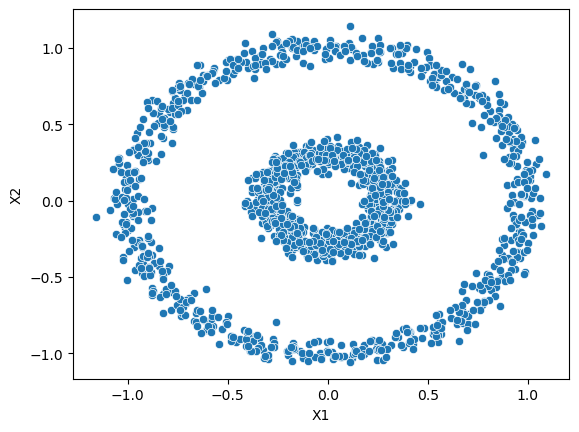

In [10]:
sns.scatterplot(data=circles,x='X1',y='X2')

#### KMeans Limitations

In [11]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

In [12]:
from sklearn.cluster import KMeans

In [13]:
model=KMeans(n_clusters=3)  #for blobs

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


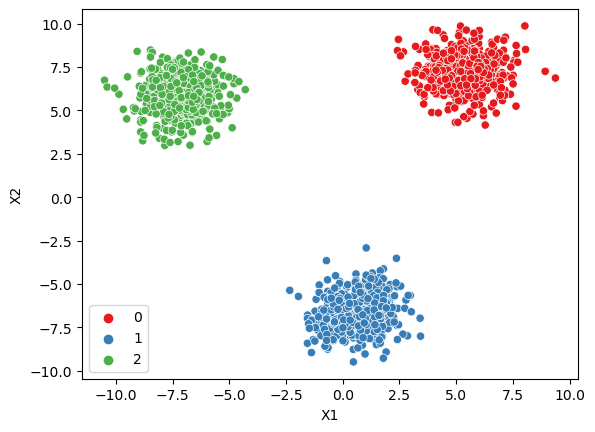

In [14]:
display_categories(model,blobs)

In [15]:
model=KMeans(n_clusters=2)  #for moons and circles

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


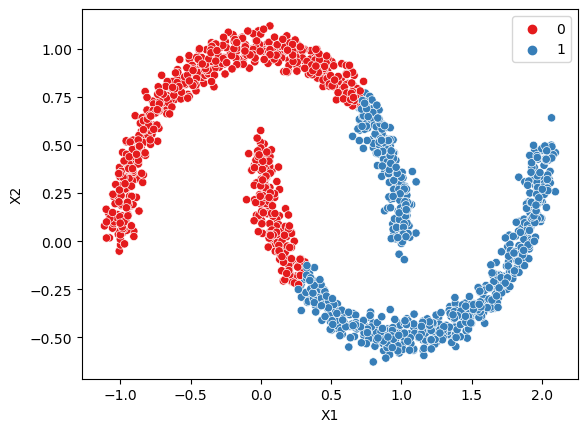

In [16]:
display_categories(model,moons)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


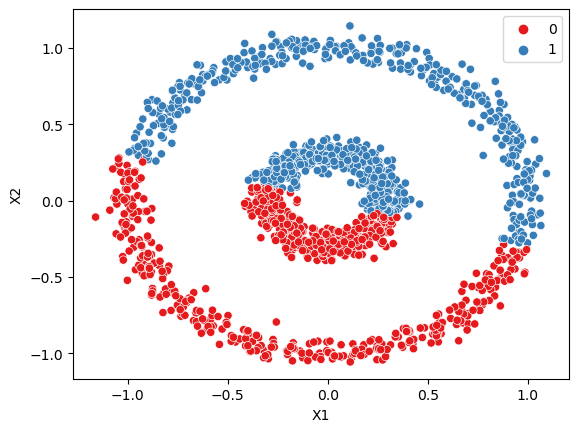

In [17]:
display_categories(model,circles)

#### Solution:- DBSCAN 

In [18]:
from sklearn.cluster import DBSCAN

In [19]:
model = DBSCAN()

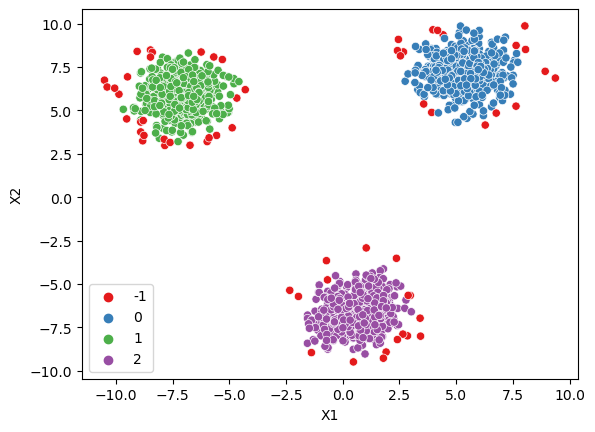

In [20]:
display_categories(model,blobs)    #-1 represents the outliers

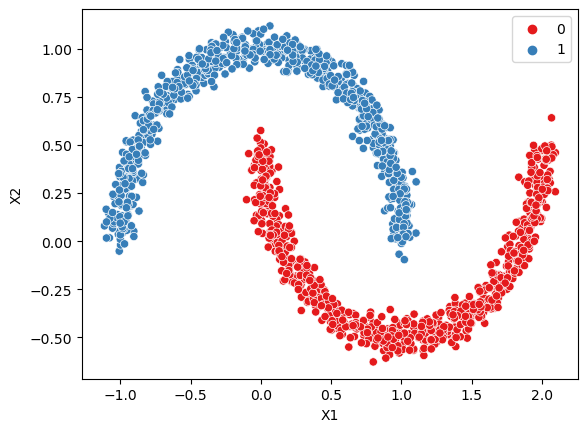

In [22]:
model = DBSCAN(eps=0.15)
display_categories(model,moons)  

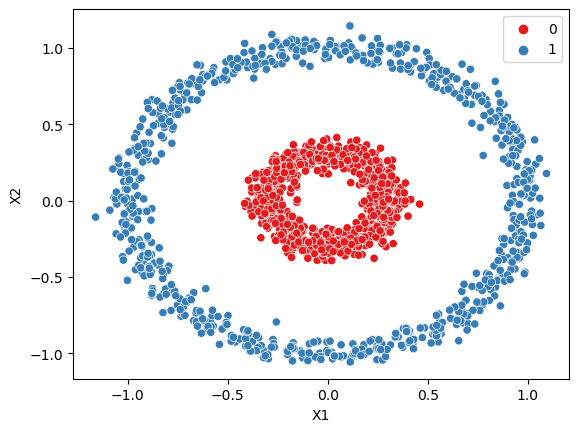

In [23]:
model = DBSCAN(eps=0.15)
display_categories(model,circles)  

#### HyperParameter Tuning Methods

In [24]:
two_blobs = pd.read_csv('cluster_two_blobs.csv')

In [25]:
two_blobs_outliers = pd.read_csv('cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

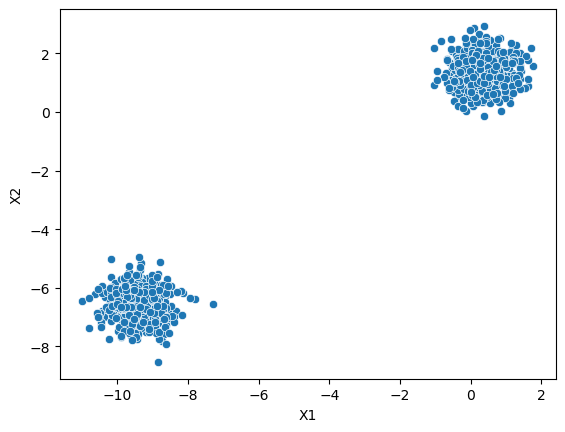

In [26]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<Axes: xlabel='X1', ylabel='X2'>

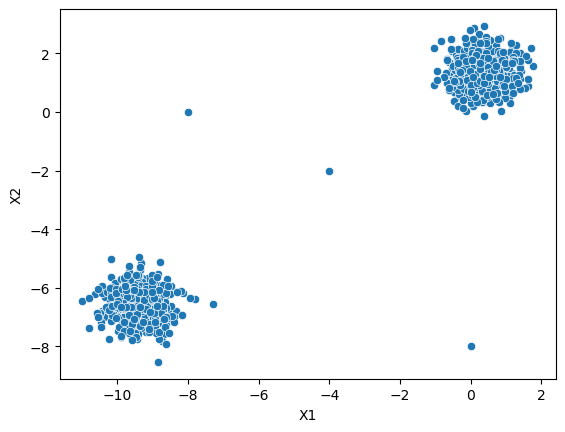

In [27]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

##### For Eps

In [28]:
dbscan = DBSCAN()

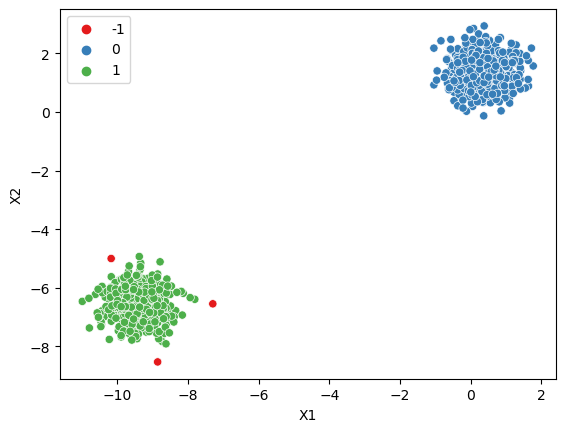

In [29]:
display_categories(dbscan,two_blobs)

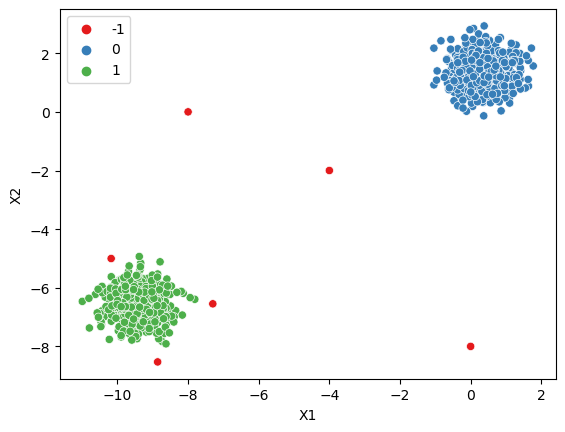

In [30]:
display_categories(dbscan,two_blobs_outliers)

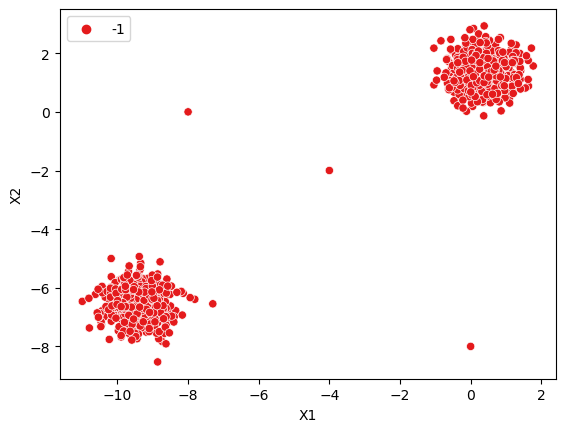

In [31]:
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan,two_blobs_outliers)

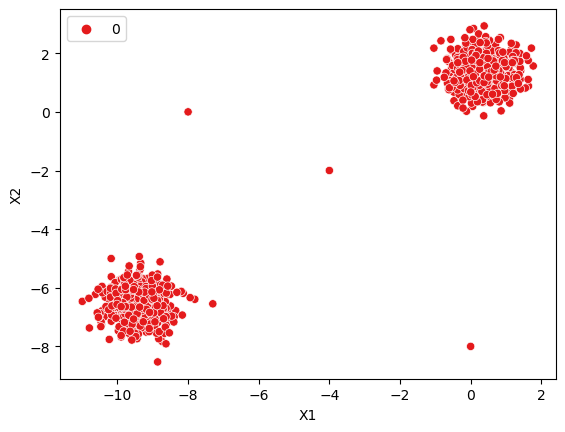

In [32]:
dbscan = DBSCAN(eps=10)
display_categories(dbscan,two_blobs_outliers)

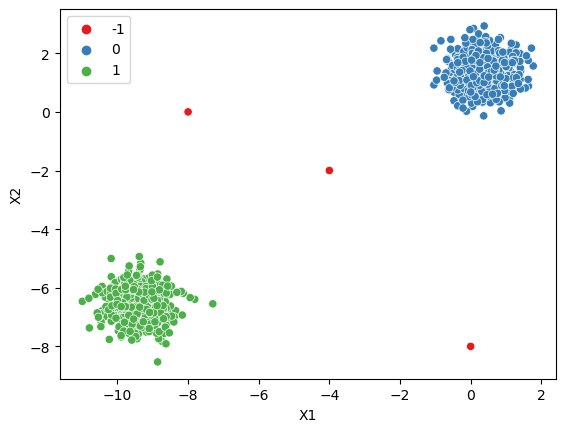

In [33]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outliers)

In [34]:
dbscan.labels_ 

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [36]:
np.sum(dbscan.labels_ == -1)  #total outliers found

3

In [39]:
outlier_percent = []
number_of_outliers = []
for eps in np.linspace(0.001,7,200):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)

    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

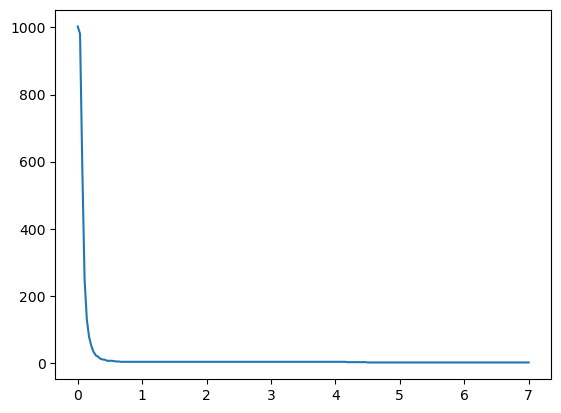

In [40]:
sns.lineplot(x=np.linspace(0.001,7,200),y=number_of_outliers)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


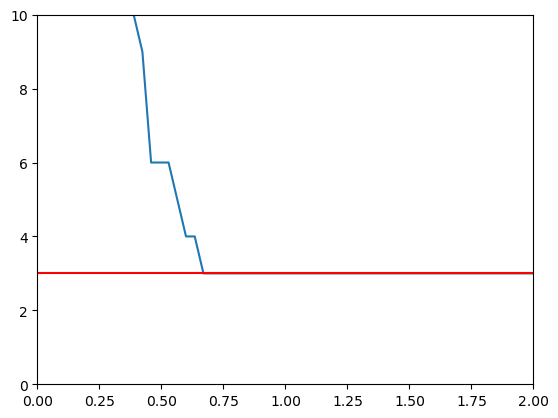

In [44]:
sns.lineplot(x=np.linspace(0.001,7,200),y=number_of_outliers)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=2,color='red')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 2.0)

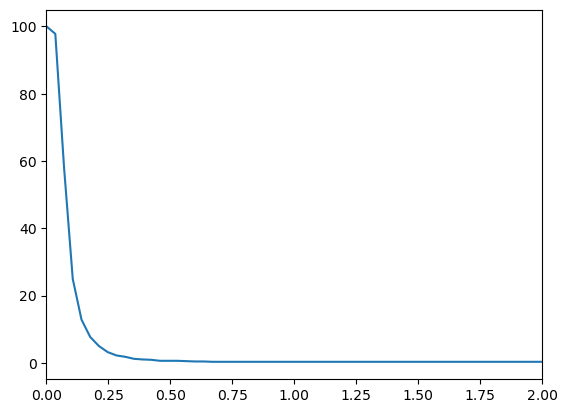

In [43]:
sns.lineplot(x=np.linspace(0.001,7,200),y=outlier_percent)
plt.xlim(0,2)

##### For MinPoints

In [45]:
outlier_percent = []
number_of_outliers = []
for n in np.arange(1,100):
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)

    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

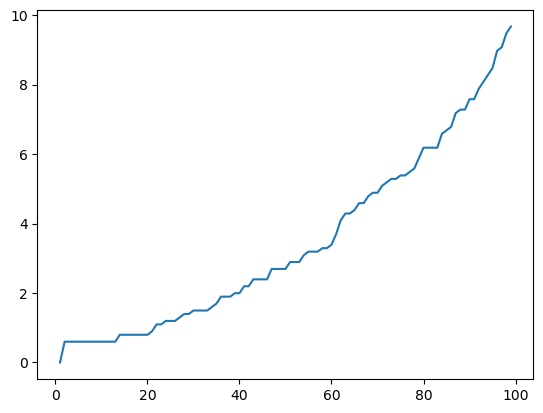

In [46]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)

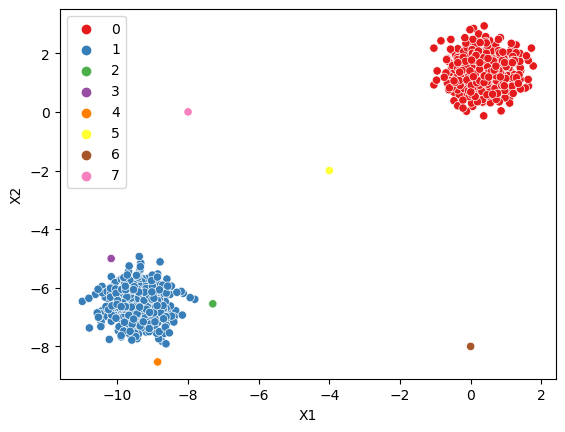

In [47]:
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan,two_blobs_outliers)

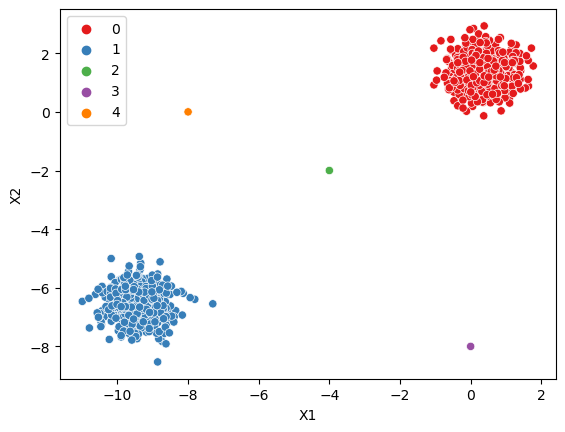

In [48]:
dbscan = DBSCAN(min_samples=1,eps=0.75)
display_categories(dbscan,two_blobs_outliers)

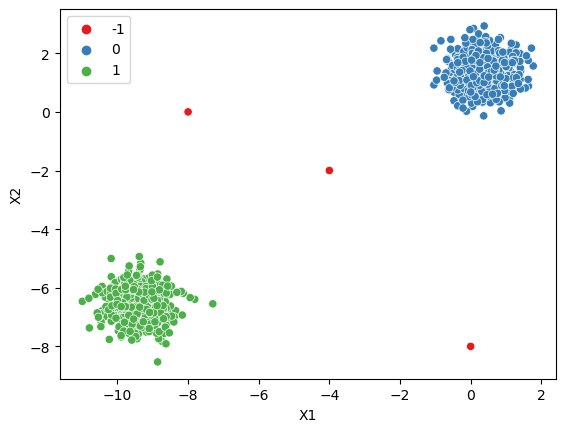

In [49]:
dbscan = DBSCAN(min_samples=3,eps=0.75)
display_categories(dbscan,two_blobs_outliers)